In [1]:
import numpy as np
from matplotlib import pyplot as plt

params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

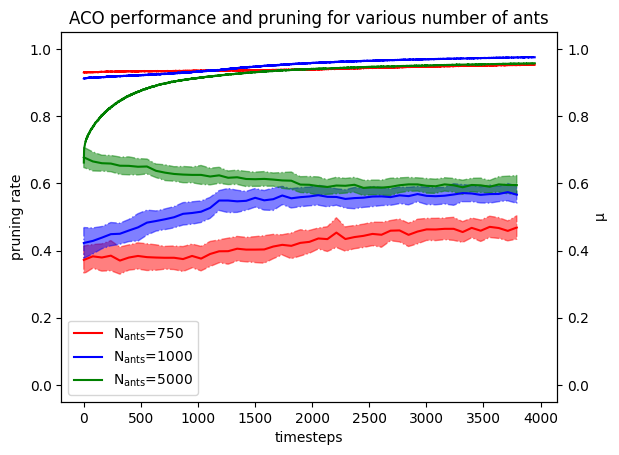

In [2]:
n_ants_arr = [750, 1000, 5000]
rhos = [0.2, 0.1, 0.01]
min_accs = [0.6, 0.7, 0.8]
ns = [0, 1, 2, 3, 4]
colors = ['r', 'b', 'g']

file_spec_fn = lambda n_ants, rho, min_acc, n: f'./data/fashion-pruned_percentage-accuracies_aco_baseline-{n_ants}-1.0-{rho}-{min_acc}-{n}.txt'

fig, ax1 = plt.subplots()

for n_ants, color in zip(n_ants_arr, colors):
    pruned_percs, aco_accs, baseline_accs = [], [], []
    for n in ns:
        pruned_perc, aco_acc, baseline_acc = np.loadtxt(file_spec_fn(n_ants, rhos[1], min_accs[0], n), dtype=float, delimiter=',')
        pruned_percs.append(pruned_perc)
        aco_accs.append(aco_acc)
        baseline_accs.append(baseline_acc)
    
    pruned_perc = np.mean(pruned_percs, axis=0)
    aco_accs = np.mean(aco_accs, axis=0)
    baseline_accs = np.mean(baseline_accs, axis=0)
    
#     plt.plot(aco_acc_mean, label='$N_{ants}$ = ' + f'{n_ants}')
    
    step = 79
    r = np.arange(0, len(aco_accs), step)
    aco_means = np.zeros(len(r)-1, dtype=float)
    aco_stds = np.zeros_like(aco_means)
    baseline_means = np.zeros_like(aco_means)
    baseline_stds = np.zeros_like(aco_means)
    # diff_accs = aco_accs - baseline_accs
    # diff_means = np.zeros(len(r)-1, dtype=float)
    # diff_stds = np.zeros_like(aco_means)

    for i in range(0, len(r)-1):
        aco_data = aco_accs[i*step: (i+1)*step]
        aco_means[i] = aco_data.mean()
        aco_stds[i] = aco_data.std()
        baseline_data = baseline_accs[i*step: (i+1)*step]
        baseline_means[i] = baseline_data.mean()
        baseline_stds[i] = baseline_data.std()
        # diff_data = diff_accs[i*step: (i+1)*step]
        # diff_means[i] = diff_data.mean()
        # diff_stds[i] = diff_data.std()
    ax1.plot(r[:-1], aco_means, label='$N_{ants}$='+f'{n_ants}', color=color)
    ax1.fill_between(r[:-1], aco_means-aco_stds, aco_means+aco_stds, alpha=0.5, color=color, linestyle='-.')


ax1.set_xlabel('timesteps')
ax1.set_ylabel('pruning rate')
ax1.set_ylim(-0.05, 1.05)
ax2 = ax1.twinx() 

ax2.set_ylabel('$\mu$') 
ax2.set_ylim(-0.05, 1.05)





for n_ants, color in zip(n_ants_arr, colors):
    pruned_percs, aco_accs, baseline_accs = [], [], []
    for n in ns:
        pruned_perc, aco_acc, baseline_acc = np.loadtxt(file_spec_fn(n_ants, rhos[1], min_accs[0], n), dtype=float, delimiter=',')
        pruned_percs.append(pruned_perc)
        aco_accs.append(aco_acc)
        baseline_accs.append(baseline_acc)
    
    pruned_perc = np.mean(pruned_percs, axis=0)
    aco_accs = np.mean(aco_accs, axis=0)
    baseline_accs = np.mean(baseline_accs, axis=0)
    
    ax2.plot(pruned_perc, label='$N_{ants}$='+f'{n_ants}', color=color)
ax2.legend()

# plt.xlabel('timesteps')
# plt.ylabel('pruning rate')
plt.title('ACO performance and pruning for various number of ants')
# plt.ylim(0.5, 1)
# plt.legend()
# plt.savefig("ACO_perf_N_ANTS.png")
plt.show()


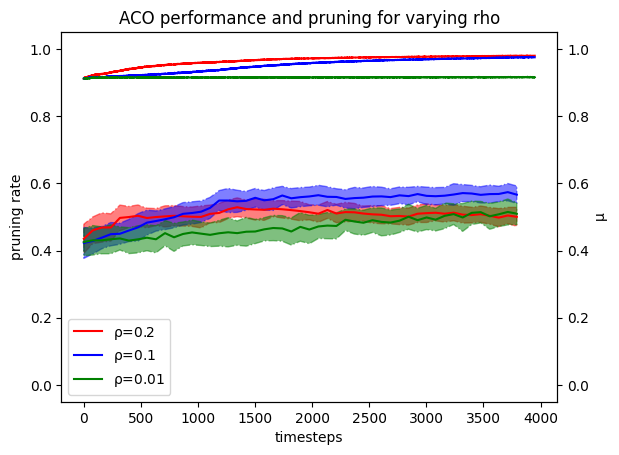

In [3]:
n_ants_arr = [750, 1000, 5000]
rhos = [0.2, 0.1, 0.01]
min_accs = [0.6, 0.7, 0.8]
ns = [0, 1, 2, 3, 4]
colors = ['r', 'b', 'g']

file_spec_fn = lambda n_ants, rho, min_acc, n: f'./data/fashion-pruned_percentage-accuracies_aco_baseline-{n_ants}-1.0-{rho}-{min_acc}-{n}.txt'

fig, ax1 = plt.subplots()


for rho, color in zip(rhos, colors):
    pruned_percs, aco_accs, baseline_accs = [], [], []
    for n in ns:
        pruned_perc, aco_acc, baseline_acc = np.loadtxt(file_spec_fn(n_ants_arr[1], rho, min_accs[0], n), dtype=float, delimiter=',')
        pruned_percs.append(pruned_perc)
        aco_accs.append(aco_acc)
        baseline_accs.append(baseline_acc)
    
    pruned_perc = np.mean(pruned_percs, axis=0)
    aco_accs = np.mean(aco_accs, axis=0)
    baseline_accs = np.mean(baseline_accs, axis=0)
    
#     plt.plot(aco_acc_mean, label='$N_{ants}$ = ' + f'{n_ants}')
    
    step = 79
    r = np.arange(0, len(aco_accs), step)
    aco_means = np.zeros(len(r)-1, dtype=float)
    aco_stds = np.zeros_like(aco_means)
    baseline_means = np.zeros_like(aco_means)
    baseline_stds = np.zeros_like(aco_means)
    for i in range(0, len(r)-1):
        aco_data = aco_accs[i*step: (i+1)*step]
        aco_means[i] = aco_data.mean()
        aco_stds[i] = aco_data.std()
        baseline_data = baseline_accs[i*step: (i+1)*step]
        baseline_means[i] = baseline_data.mean()
        baseline_stds[i] = baseline_data.std()
    ax1.plot(r[:-1], aco_means, label=r'$\rho$='+f'{rho}', color=color)
    ax1.fill_between(r[:-1], aco_means-aco_stds, aco_means+aco_stds, alpha=0.5, color=color, linestyle='-.')


ax1.set_xlabel('timesteps')
ax1.set_ylabel('pruning rate')
ax1.set_ylim(-0.05, 1.05)
ax2 = ax1.twinx() 

ax2.set_ylabel('$\mu$') 
ax2.set_ylim(-0.05, 1.05)

for rho, color in zip(rhos, colors):
    pruned_percs, aco_accs, baseline_accs = [], [], []
    for n in ns:
        pruned_perc, aco_acc, baseline_acc = np.loadtxt(file_spec_fn(n_ants_arr[1], rho, min_accs[0], n), dtype=float, delimiter=',')
        pruned_percs.append(pruned_perc)
        aco_accs.append(aco_acc)
        baseline_accs.append(baseline_acc)
    
    pruned_perc = np.mean(pruned_percs, axis=0)
    aco_accs = np.mean(aco_accs, axis=0)
    baseline_accs = np.mean(baseline_accs, axis=0)
    
    ax2.plot(pruned_perc, label=r'$\rho$='+f'{rho}', color=color)
# ax2.xlabel('timesteps')
# pl.ylabel('pruning rate')
plt.title('ACO performance and pruning for varying rho')
# plt.ylim(0.5, 1)
ax2.legend()
# plt.savefig("ACO_perf_rho.png")

plt.show()

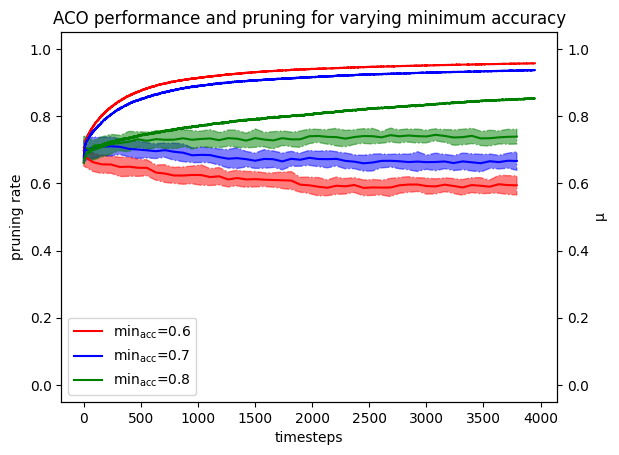

In [5]:
n_ants_arr = [750, 1000, 5000]
rhos = [0.2, 0.1, 0.01]
min_accs = [0.6, 0.7, 0.8]
ns = [0, 1, 2, 3, 4]
colors = ['r', 'b', 'g']

file_spec_fn = lambda n_ants, rho, min_acc, n: f'./data/fashion-pruned_percentage-accuracies_aco_baseline-{n_ants}-1.0-{rho}-{min_acc}-{n}.txt'

fig, ax1 = plt.subplots()


for min_acc, color in zip(min_accs, colors):
    pruned_percs, aco_accs, baseline_accs = [], [], []
    for n in ns:
        pruned_perc, aco_acc, baseline_acc = np.loadtxt(file_spec_fn(n_ants_arr[2], rhos[1], min_acc, n), dtype=float, delimiter=',')
        # print(pruned_perc[-1])
        pruned_percs.append(pruned_perc)
        aco_accs.append(aco_acc)
        baseline_accs.append(baseline_acc)
    
    aco_accs.append(aco_acc)
    pruned_perc = np.mean(pruned_percs, axis=0)
    aco_accs = np.mean(aco_accs, axis=0)
    baseline_accs = np.mean(baseline_accs, axis=0)
    
#     plt.plot(aco_acc_mean, label='$N_{ants}$ = ' + f'{n_ants}')
    
    step = 79
    r = np.arange(0, len(aco_accs), step)
    aco_means = np.zeros(len(r)-1, dtype=float)
    aco_stds = np.zeros_like(aco_means)
    baseline_means = np.zeros_like(aco_means)
    baseline_stds = np.zeros_like(aco_means)
    for i in range(0, len(r)-1):
        aco_data = aco_accs[i*step: (i+1)*step]
        aco_means[i] = aco_data.mean()
        aco_stds[i] = aco_data.std()
        baseline_data = baseline_accs[i*step: (i+1)*step]
        baseline_means[i] = baseline_data.mean()
        baseline_stds[i] = baseline_data.std()
    ax1.plot(r[:-1], aco_means, label=r'$min_{acc}$='+f'{min_acc}', color=color)
    ax1.fill_between(r[:-1], aco_means-aco_stds, aco_means+aco_stds, alpha=0.5, color=color, linestyle='-.')

ax1.set_xlabel('timesteps')
ax1.set_ylabel('pruning rate')
ax1.set_ylim(-0.05, 1.05)
ax2 = ax1.twinx() 

ax2.set_ylabel('$\mu$') 
ax2.set_ylim(-0.05, 1.05)

for min_acc, color in zip(min_accs, colors):
    pruned_percs, aco_accs, baseline_accs = [], [], []
    for n in ns:
        pruned_perc, aco_acc, baseline_acc = np.loadtxt(file_spec_fn(n_ants_arr[2], rhos[1], min_acc, n), dtype=float, delimiter=',')
        pruned_percs.append(pruned_perc)
        aco_accs.append(aco_acc)
        baseline_accs.append(baseline_acc)
    
    pruned_perc = np.mean(pruned_percs, axis=0)
    aco_accs = np.mean(aco_accs, axis=0)
    baseline_accs = np.mean(baseline_accs, axis=0)
    
    ax2.plot(pruned_perc, label=r'$min_{acc}$='+f'{min_acc}', color=color)
ax2.legend()
plt.title('ACO performance and pruning for varying minimum accuracy')
# plt.savefig("ACO_perf_min_acc.png")

plt.show()

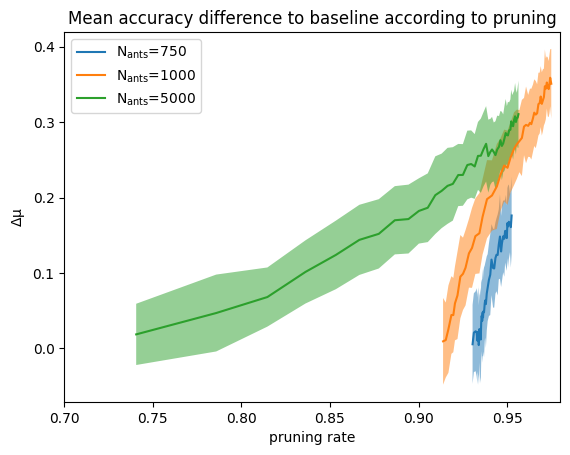

In [6]:
for n_ants, color in zip(n_ants_arr, colors):
    pruned_percs, aco_accs, baseline_accs = [], [], []
    for n in ns:
        pruned_perc, aco_acc, baseline_acc = np.loadtxt(file_spec_fn(n_ants, rhos[1], min_accs[0], n), dtype=float, delimiter=',')
        pruned_percs.append(pruned_perc)
        aco_accs.append(aco_acc)
        baseline_accs.append(baseline_acc)
    
    pruned_perc = np.mean(pruned_percs, axis=0)
    aco_accs = np.mean(aco_accs, axis=0)
    baseline_accs = np.mean(baseline_accs, axis=0)
    step = 79
    r = np.arange(0, len(aco_accs), step)
    
    aco_means = np.zeros(len(r)-1, dtype=float)
    aco_stds = np.zeros_like(aco_means)
    
    baseline_means = np.zeros_like(aco_means)
    baseline_stds = np.zeros_like(aco_means)
    
    pruned_perc_mean = np.zeros_like(aco_means)

    diff_accs = aco_accs - baseline_accs
    diff_means = np.zeros(len(r)-1, dtype=float)
    diff_stds = np.zeros_like(aco_means)
    
    for i in range(0, len(r)-1):

        diff_data = diff_accs[i*step: (i+1)*step]
        diff_means[i] = diff_data.mean()
        diff_stds[i] = diff_data.std()
        p_data = pruned_perc[i*step: (i+1)*step]
        pruned_perc_mean[i] = p_data.mean()
    plt.plot(pruned_perc_mean, diff_means, label='$N_{ants}$='+f'{n_ants}')
    plt.fill_between(pruned_perc_mean, diff_means-diff_stds, diff_means+diff_stds, alpha=0.5, linestyle='-.')

    # plt.plot(pruned_perc_mean, aco_means - baseline_means, label='$N_{ants}$='+f'{n_ants}')
# plt.plot([0, 1], [0, 0], color='black', linestyle='--')
plt.title('Mean accuracy difference to baseline according to pruning')
plt.xlabel('pruning rate')
plt.ylabel('$\Delta \mu$')
plt.xlim(0.7, 0.98)
# plt.xscale("log")
plt.legend()
# plt.savefig("ACO_perf_pruning.png")
plt.show()